<a href="https://colab.research.google.com/github/alexandreIFB/projects_colabority/blob/master/BioInformatica_ViuvaNega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução


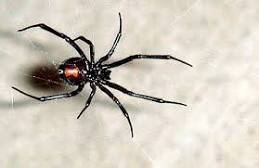

“A viúva-negra americana (Latrodectus mactans) é uma espécie
de aranha da família dos teridiídeos, distribuída por toda a América. O
nome provém do fato de a fêmea geralmente se **alimentar do macho**
após a cópula. No Brasil, é encontrada atualmente próxima ao mar,
sobretudo em praias pouco frequentadas. É amplamente encontrada em
torno da Baía da Guanabara. (...) Por ser uma aranha muito conhecida
no Brasil e por saber-se que sua peçonha é muito forte, há a alusão de
que esta é a aranha **mais venenosa que existe**. Porém, mesmo no
Brasil, existem dois gêneros considerados de maior perigo: a
**aranha-marrom (Loxosceles sp.), e a armadeira (Phoneutria sp.)**,
sendo esta última considerada por muitos a aranha mais peçonhenta do
mundo, ambas encontradas em praticamente todo o país.”

#Dicionario

* **Peçonhenta:** que tem peçonha; venenoso.

* **teridiídeos**: As espécies incluídas nesta família caraacterizam-se pela presença de uma placa genital nas fêmeas, possuírem cribelo e recorrerem a fios pegajosos para construir as armadilhas com que capturam as suas presas

#Pesquisa - 1 Etapa

Imagine que foi encontrada uma aranha com características muito
**similares à viúva negra na praia de Copacabana**, porém com um **veneno mais poderoso**, similar às encontradas em aranhas-marrom e arma-deiras. Para melhor estudar esta aranha, foi proposto um **sequenciamento de seu genoma**, de forma a identificar **genes associados à produção de toxinas**.

Como visto em sala de aula, o sequenciamento de um genoma não é capaz de produzir a **sequência completa** do DNA, mas sim uma imensa quantidade de **fragmentos** de DNA (reads). De forma a entender as características do sequenciamentos de outras aranhas “próximas” responda a questão a seguir:

##1 - Obtendo os fragmentos(reads)

A primeira atividade de um bioinformata é adquirir e analisar a qualidade dessas reads. Os dados de sequenciamento são normalmente armazenados no banco de dados SRA (Sequence Read archives) do NCBI.

### a) Pesquise o termo **Latrodectus** no banco de dados SRA. Quantos dados de sequenciamento foram retornados? Quantos deles são dados de DNA e quantos são de dados de RNA?

**R:** Foi encontrado um total de **63** sequenciamentos, deles, **56** DE RNA e **7** de DNA

###b) Filtre a busca para DNA. Quais tecnologias de sequenciamento foram utilizadas para estes dados?



**6** Illumina

**1** Oxford Nanopore

**Illumina**: O sequenciamento de corantes Illumina é uma técnica usada para determinar a série de pares de bases no DNA, também conhecida como sequenciamento de DNA. O conceito de química terminada reversível foi inventado por Bruno Canard e Simon Sarfati no Instituto Pasteur em Paris.


**Oxford Nanopore**: O sequenciamento de nanoporos é uma tecnologia única e escalável que permite a análise direta e em tempo real de fragmentos longos de DNA ou RNA . Ele funciona monitorando as mudanças em uma corrente elétrica à medida que os ácidos nucleicos são passados ​​por um nanoporo de proteína. O sinal resultante é decodificado para fornecer a sequência específica de DNA ou RNA.

###c) Escolha uma das coleções de reads retornado e responda:

**i) Qual seu código de acesso (acession)?**

SRX11502870

**ii) Qual a estratégia de sequenciamento foi usada? O que faz essa estratégia?**

*Oxford Nanopore*: O sequenciamento de nanoporos é uma tecnologia única e escalável que permite a análise direta e em tempo real de fragmentos longos de DNA ou RNA . Ele funciona monitorando as mudanças em uma corrente elétrica à medida que os ácidos nucleicos são passados ​​por um nanoporo de proteína. O sinal resultante é decodificado para fornecer a sequência específica de DNA ou RNA.

**iii) Qual layout foi usado, Paired-end ou single-end? o que significam estes termos e quais as vantagens do uso de um em relação ao outro?**

*Paired-end* : O sequenciamento Paired-end permite que os usuários sequenciem ambas as extremidades de um fragmento e gerem dados de sequência alinháveis ​​e de alta qualidade. O sequenciamento Paired-end **facilita** a detecção de rearranjos genômicos e elementos de sequência repetitiva, bem como fusões de genes e novos transcritos.

*Single-end*: O sequenciamento de leitura única envolve o sequenciamento de DNA de apenas uma extremidade e é a maneira mais simples de utilizar o sequenciamento da **Illumina**. Esta solução fornece grandes volumes de dados de alta qualidade, de **forma rápida e econômica**. O sequenciamento de leitura única pode ser uma boa escolha para certos métodos, como o sequenciamento por imunoprecipitação de cromatina ou RNA-Seq pequeno (ChIP-Seq). 

*Paired-end vs Single-end*: O paired-end além de produzir o dobro de leituras pelo mesmo tempo e esforço da biblioteca, as sequências alinhadas como pares de leitura permitem um alinhamento de leitura mais preciso e a capacidade de detectar variantes de inserção-exclusão, ja o Single-end é um metodo bom quando se deseja economia.

**iv) Quantas runs foram realizadas? quais os tamanhos dos arquivos?**

Runs: 1 run, 5.2M spots, 99.8G bases, 82.8Gb

###d) Volte para a página da pesquisa (com o filtro de DNA), clique no link send to e crie um arquivo no formato summary. Apartir deste arquivo, faça uma tabela apresentando as características, levantadas nas questões anteriores, de cada sequenciamento.

In [ ]:
import pandas as pd

In [ ]:
dados_dna = pd.read_csv('/content/sra_result.csv') 
dados_dna.drop(columns=['Experiment Title','Organism Name','Instrument','Submitter','Study Accession','Study Title','Sample Title','Total Spots','Total Bases','Library Name','Sample Accession', 'Library Source','Library Selection'], inplace=True)

dados_dna

,Experiment Accession,"Total Size, Mb",Total RUNs,Library Strategy
0,SRX11502871,20402.29,1,WGS
1,SRX11502870,84801.54,1,WGS
2,SRX3180842,32718.65,2,WGS
3,SRX3180841,25968.79,1,WGS
4,SRX330084,21268.43,1,WGS
5,SRX330083,36667.14,2,WGS
6,SRX330082,34789.52,2,WGS


#Pesquisa - 2 Etapa 

Após o tratamento das reads, foi realizada a etapa de filtragem,
responsável pelo descarte de reads de baixa qualidade, e de
montagem, responsável por transformar reads em “pedaços” maiores
de DNA (iremos explorar estas duas fases ao longo do curso).

Depois disso, entramos na fase de anotação, que consiste em dar
um significado (função) para as sequências encontradas. Nesta fase,
voltamos ao objetivo principal de nossa pesquisa, a de encontrar genes
associados à produção de toxinas. Normalmente, a identificação de uma
função putativa (ainda não validada in-vivo) de uma proteína é feita
através da comparação das sequências obtidas pelo processo descrito
anteriormente com sequências “anotadas” em banco dados biológicas.

Foi-lhe dada a tarefa de construir duas coleções de proteínas,
relacionadas com a produção de toxinas, a serem utilizadas para essa
comparação, uma com dados manualmente curados e outra sem
validação in-vivo. Essa coleção de dados deve ser armazenada em um
arquivo no formato fasta.

##2) Resolva os passos a seguir para obter a coleção de dados sem validação in-vivo.

### a) Entre no site do Uniprot. Quantas sequências de toxinas existem no TrEMBL?

1.090.209

###b) Ao lado da barra de pesquisa clique em Advanced. Faça uma pesquisa que filtre a busca por: 

* i) Reviewed: no
* ii) All: toxin
* iii) Organism: Spider

### Quantas sequências foram retornadas? Qual informação foi adicionada à barra de pesquisa?

1390 Resultado
Barra de pesquisa: *toxin organism:spider AND reviewed:no*

###c) Faça o download de todas as sequências no formato FASTA. (anexe o arquivo junto com o documento de respostas)

Anexado

### d) Faça também o download do arquivo TEXT. A partir deste arquivo obtenha:

* i) AC - Accession Number de cada proteína
* ii) O nome recomendado que descreve a função de cada proteína(pesquisar o significado das linhas que come-
çam com DE).

Por fim, crie uma tabela que relacione AC com o nome
recomendado que descreve a função de cada proteína encontrada.

Obs.: para cada AC, pode ser relacionado neste exercício apenas um
nome recomendado.

OK

#3- De forma análoga ao exercício anterior, crie um arquivo de formato fasta de uma coleção de dados manualmente curados e uma tabela que descreve AC e a função de cada proteína da coleção.